In [ ]:
# Install required libraries
!pip install -q tensorflow keras opencv-python
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
dataset_path = '/content/drive/MyDrive/Psoriasis'
train_dir = os.path.join(dataset_path, 'train')
test_dir = os.path.join(dataset_path, 'test')


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directory
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)



Found 164 images belonging to 5 classes.
Found 43 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')  # Adjust to your number of classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,908,037 (91.20 MB)

 Trainable params: 23,908,037 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=40
)


Epoch 1/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 601ms/step - accuracy: 0.6816 - loss: 0.9394 - val_accuracy: 0.6047 - val_loss: 1.1109
Epoch 2/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 761ms/step - accuracy: 0.7134 - loss: 0.8059 - val_accuracy: 0.6512 - val_loss: 1.0005
Epoch 3/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 489ms/step - accuracy: 0.7506 - loss: 0.8327 - val_accuracy: 0.3721 - val_loss: 1.5171
Epoch 4/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 475ms/step - accuracy: 0.6382 - loss: 0.9364 - val_accuracy: 0.6279 - val_loss: 1.1673
Epoch 5/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 471ms/step - accuracy: 0.6779 - loss: 0.8416 - val_accuracy: 0.4884 - val_loss: 1.2367
Epoch 6/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 713ms/step - accuracy: 0.7090 - loss: 0.8210 - val_accuracy: 0.5814 - val_loss: 1.1923
Epoch 7/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 469ms/step - accuracy: 0.6678 - loss: 0.7546 - val_accuracy: 0.6047 - val_loss: 1.3712
Epoch 8/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 469ms/step - accuracy: 0.6332 - loss: 0.8212 - val_accuracy: 0.4651 - val_loss:

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_true = test_data.classes
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

print(confusion_matrix(y_true, y_pred_classes))
print(classification_report(y_true, y_pred_classes))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
[[0 2 1 2 2]
 [2 4 2 2 1]
 [1 2 1 3 0]
 [1 3 0 3 3]
 [3 0 3 1 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.36      0.36      0.36        11
           2       0.14      0.14      0.14         7
           3       0.27      0.30      0.29        10
           4       0.14      0.12      0.13         8

    accuracy                           0.21        43
   macro avg       0.18      0.19      0.19        43
weighted avg       0.21      0.21      0.21        43



In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_true), y=y_true)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8135 - loss: 0.4944
Test Accuracy: 0.81
Test Loss: 0.52


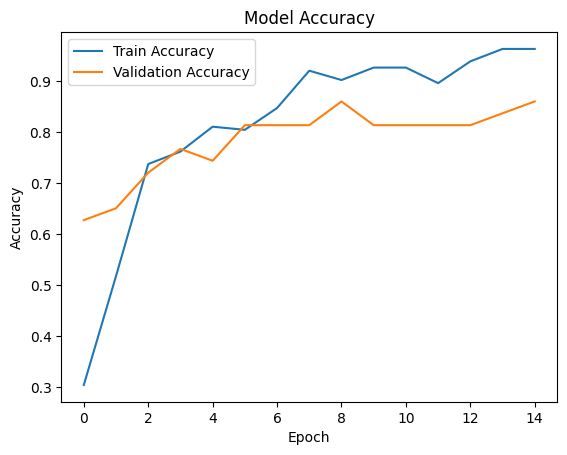

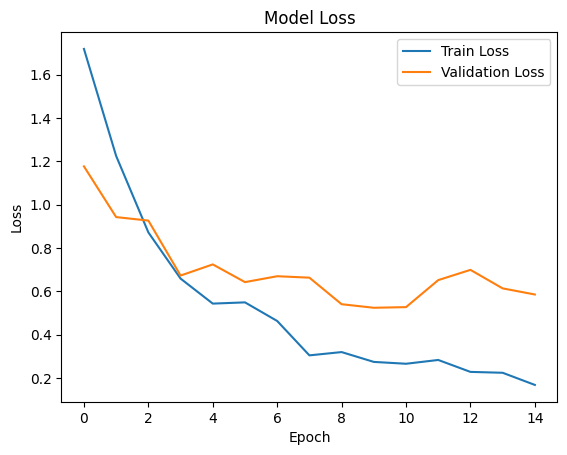

In [ ]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.2f}")
print(f"Test Loss: {test_loss:.2f}")
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
model.save('/content/drive/MyDrive/Psoriasis/psoriasis_model.h5')


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_class(img_path):

    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    class_label = list(train_data.class_indices.keys())[class_index]

    return class_label

# Example usage
img_path = '/content/drive/MyDrive/Psoriasis/sample.jpg'
predicted_class = predict_class(img_path)
print("Predicted Psoriasis Type:", predicted_class)
recommendations = {
    "Erythrodermic": {
        "Diet": """Avoid spicy foods, alcohol, and caffeine. Increase intake of hydrating fruits (watermelon, cucumber), omega-3 rich foods (flaxseeds, walnuts), and leafy greens. Drink at least 3L of water per day.""",
        "Medicine": """Immunosuppressants like Cyclosporine or Methotrexate. In severe cases, Biologics like Infliximab may be recommended. Consult a dermatologist immediately as this type can be life-threatening."""
    },
    "Guattate": {
        "Diet": """Consume oily fish (salmon, sardines), berries (blueberries, strawberries), and green vegetables. Avoid refined sugars and white bread. Boost Vitamin D intake via sunlight or fortified foods.""",
        "Medicine": """Topical corticosteroids (like betamethasone), phototherapy (narrowband UVB), or short-term oral antibiotics (if triggered by strep throat)."""
    },
    "Inversus": {
        "Diet": """Follow a low-sugar, low-carb, gluten-free diet. Include anti-inflammatory foods like turmeric, ginger, olive oil, and avocados. Avoid synthetic clothing, as sweating can worsen symptoms.""",
        "Medicine": """Topical calcineurin inhibitors like Tacrolimus or Pimecrolimus, which are less irritating in sensitive areas. Antifungal creams if infections occur."""
    },
    "Plaque": {
        "Diet": """Anti-inflammatory diet including fatty fish, olive oil, spinach, and nuts. Limit red meat, processed food, dairy, and sugar. Consider Vitamin D and omega-3 supplements.""",
        "Medicine": """Topical steroids (clobetasol), Vitamin D analogs (calcipotriene), and biologics like Adalimumab or Etanercept for moderate to severe cases."""
    },
    "Pustular": {
        "Diet": """Stay well hydrated, avoid spicy and greasy food. Include cooling foods like cucumber, coconut water, and aloe vera juice. Limit intake of dairy and animal protein.""",
        "Medicine": """Systemic treatments like Acitretin, Methotrexate, or Biologics. In severe cases, hospitalization and IV therapy may be required."""
    }
}

print("Recommended Diet:", recommendations[predicted_class]['Diet'])
print("Suggested Medicine:", recommendations[predicted_class]['Medicine'])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted Psoriasis Type: Inversus
Recommended Diet: Follow a low-sugar, low-carb, gluten-free diet. Include anti-inflammatory foods like turmeric, ginger, olive oil, and avocados. Avoid synthetic clothing, as sweating can worsen symptoms.
Suggested Medicine: Topical calcineurin inhibitors like Tacrolimus or Pimecrolimus, which are less irritating in sensitive areas. Antifungal creams if infections occur.


In [40]:
!pip install gradio
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image

# Load your model
model = load_model("/content/drive/MyDrive/Psoriasis/psoriasis_model.h5")

# Class names (in order of your training)
class_names = ["Erythrodermic", "Guattate", "Inversus", "Plaque", "Pustular"]

# Confidence threshold (adjustable)
CONFIDENCE_THRESHOLD = 0.7

# Recommendations dictionary (same as before)
recommendations = {
    "Erythrodermic": {
        "Diet": "Avoid spicy foods, alcohol, and caffeine. Increase hydrating fruits and omega-3 intake.",
        "Medicine": "Cyclosporine, Methotrexate, or Biologics like Infliximab. See a dermatologist urgently."
    },
    "Guattate": {
        "Diet": "Eat oily fish, berries, and green veggies. Avoid refined sugar. Get sunlight/Vitamin D.",
        "Medicine": "Topical steroids, UVB therapy, antibiotics if triggered by strep throat."
    },
    "Inversus": {
        "Diet": "Low-sugar, low-carb, gluten-free. Include turmeric, olive oil, avocado. Avoid synthetic clothes.",
        "Medicine": "Tacrolimus or Pimecrolimus (calcineurin inhibitors). Use antifungals if infected."
    },
    "Plaque": {
        "Diet": "Anti-inflammatory foods like fish, olive oil, and spinach. Reduce dairy, meat, sugar.",
        "Medicine": "Clobetasol, calcipotriene, and biologics like Adalimumab, Etanercept."
    },
    "Pustular": {
        "Diet": "Stay hydrated. Eat cucumber, coconut water. Avoid spicy, greasy food and excess dairy.",
        "Medicine": "Acitretin, Methotrexate, Biologics. Hospitalization in severe cases."
    }
}

# Prediction function with confidence check
def predict_psoriasis(img):
    img = img.resize((224, 224))  # Resize to model input size
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)

    preds = model.predict(img_array)[0]
    max_prob = np.max(preds)
    predicted_index = np.argmax(preds)

    if max_prob < CONFIDENCE_THRESHOLD:
        return "Possibly Normal Skin", "No specific diet", "No medication — consult a dermatologist for diagnosis."

    label = class_names[predicted_index]
    diet = recommendations[label]["Diet"]
    medicine = recommendations[label]["Medicine"]

    return label, diet, medicine

# Gradio interface
interface = gr.Interface(
    fn=predict_psoriasis,
    inputs=gr.Image(type="pil", label="Upload Skin Image"),
    outputs=[
        gr.Textbox(label="Psoriasis Type / Status"),
        gr.Textbox(label="Diet Recommendation"),
        gr.Textbox(label="Medication Advice")
    ],
    title="🧬 Psoriasis Type Detector",
    description="Upload a skin image to detect psoriasis type"
)

interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8507d6564b5d5b1009.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


testing purpose


In [ ]:
#  checking code Install Gradio if not already installed
!pip install gradio

# Imports
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import PIL

# Load your trained model (adjust path if needed)
model = load_model('/content/drive/MyDrive/Psoriasis/psoriasis_model.h5')  # change filename if needed

# Class labels (in same order as model training)
class_labels = ['Erythrodermic', 'Guattate', 'Inversus', 'Plaque', 'Pustular']

# Detailed recommendations
recommendations = {
    "Erythrodermic": {
        "Diet": """Avoid spicy foods, alcohol, and caffeine. Increase intake of hydrating fruits (watermelon, cucumber), omega-3 rich foods (flaxseeds, walnuts), and leafy greens. Drink at least 3L of water per day.""",
        "Medicine": """Immunosuppressants like Cyclosporine or Methotrexate. In severe cases, Biologics like Infliximab may be recommended. Consult a dermatologist immediately as this type can be life-threatening."""
    },
    "Guattate": {
        "Diet": """Consume oily fish (salmon, sardines), berries (blueberries, strawberries), and green vegetables. Avoid refined sugars and white bread. Boost Vitamin D intake via sunlight or fortified foods.""",
        "Medicine": """Topical corticosteroids (like betamethasone), phototherapy (narrowband UVB), or short-term oral antibiotics (if triggered by strep throat)."""
    },
    "Inversus": {
        "Diet": """Follow a low-sugar, low-carb, gluten-free diet. Include anti-inflammatory foods like turmeric, ginger, olive oil, and avocados. Avoid synthetic clothing, as sweating can worsen symptoms.""",
        "Medicine": """Topical calcineurin inhibitors like Tacrolimus or Pimecrolimus, which are less irritating in sensitive areas. Antifungal creams if infections occur."""
    },
    "Plaque": {
        "Diet": """Anti-inflammatory diet including fatty fish, olive oil, spinach, and nuts. Limit red meat, processed food, dairy, and sugar. Consider Vitamin D and omega-3 supplements.""",
        "Medicine": """Topical steroids (clobetasol), Vitamin D analogs (calcipotriene), and biologics like Adalimumab or Etanercept for moderate to severe cases."""
    },
    "Pustular": {
        "Diet": """Stay well hydrated, avoid spicy and greasy food. Include cooling foods like cucumber, coconut water, and aloe vera juice. Limit intake of dairy and animal protein.""",
        "Medicine": """Systemic treatments like Acitretin, Methotrexate, or Biologics. In severe cases, hospitalization and IV therapy may be required."""
    }
}

# Prediction function
def predict_psoriasis(img: PIL.Image.Image):
    # Resize and normalize image
    img = img.resize((224, 224))  # Match input shape of your model
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    class_label = class_labels[class_index]

    # Fetch recommendation
    diet = recommendations[class_label]["Diet"]
    medicine = recommendations[class_label]["Medicine"]

    return class_label, diet, medicine

# Launch Gradio Interface
interface = gr.Interface(
    fn=predict_psoriasis,
    inputs=gr.Image(type="pil", label="Upload Image"),
    outputs=[
        gr.Textbox(label="Detected Psoriasis Type"),
        gr.Textbox(label="Suggested Diet (Detailed)", lines=5),
        gr.Textbox(label="Recommended Medicines (Detailed)", lines=5)
    ],
    title="🧬 Psoriasis Type Detector",
    description="Upload a skin image to detect psoriasis type and get detailed diet + medicine recommendations."
)

interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6bab10ac4e398bdb3e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
